<a href="https://colab.research.google.com/github/Hanzala491/SAAS-Dashboard/blob/main/Client_Profitability_%26_Risk_Dashboard_for_SaaS_Companies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas numpy matplotlib seaborn plotly faker scikit-learn ydata-profiling

print("✅ All libraries installed successfully!")
print("📋 Next: Run the import statements")

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.0/679.0 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=7b09cbba2e6d05eed48927e56369e520280e77abb03f784c92059ac9cd6c8202
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
✅ All libraries installed successfully!
📋 Next: Run the import statements


In [3]:
# 📦 STEP 2: Import All Libraries
# Run this after the installation is complete

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime, timedelta
from faker import Faker
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('default')  # Changed for better compatibility
sns.set_palette("husl")

print("✅ All libraries imported successfully!")
print("📊 Ready to generate data!")

✅ All libraries imported successfully!
📊 Ready to generate data!


In [4]:
# 🎲 STEP 3: Generate Realistic SaaS Data
# This will create 1000 fake SaaS clients with realistic metrics

# Set random seed for reproducible results
np.random.seed(42)
Faker.seed(42)
fake = Faker()

def create_saas_clients(num_clients=1000):
    """Create realistic SaaS client data"""

    print(f"🔄 Generating {num_clients} SaaS clients...")

    clients = []

    # Company types and their characteristics
    tiers = ['Enterprise', 'Mid-Market', 'SMB', 'Startup']
    industries = ['Technology', 'Healthcare', 'Finance', 'E-commerce',
                 'Education', 'Manufacturing', 'Marketing', 'Real Estate']

    for i in range(num_clients):
        # Choose company tier (most are SMB, fewer Enterprise)
        if i < 100:  # First 100 are Enterprise/Mid-Market
            tier = np.random.choice(['Enterprise', 'Mid-Market'])
        else:  # Rest are SMB/Startup
            tier = np.random.choice(['SMB', 'Startup'])

        # Set characteristics based on tier
        if tier == 'Enterprise':
            monthly_revenue = np.random.normal(15000, 5000)
            employees = np.random.randint(1000, 10000)
            acquisition_cost = np.random.normal(5000, 1500)
        elif tier == 'Mid-Market':
            monthly_revenue = np.random.normal(3000, 1000)
            employees = np.random.randint(100, 1000)
            acquisition_cost = np.random.normal(2000, 800)
        elif tier == 'SMB':
            monthly_revenue = np.random.normal(500, 200)
            employees = np.random.randint(10, 100)
            acquisition_cost = np.random.normal(500, 200)
        else:  # Startup
            monthly_revenue = np.random.normal(150, 80)
            employees = np.random.randint(2, 20)
            acquisition_cost = np.random.normal(200, 100)

        # Ensure positive values
        monthly_revenue = max(monthly_revenue, 50)
        acquisition_cost = max(acquisition_cost, 50)

        # Generate contract start date (last 3 years)
        start_date = fake.date_between(start_date='-3y', end_date='-1m')

        # Calculate how long they've been a client
        months_active = (datetime.now().date() - start_date).days // 30

        # Calculate churn probability (higher for smaller companies)
        base_churn_prob = {'Enterprise': 0.05, 'Mid-Market': 0.12, 'SMB': 0.25, 'Startup': 0.35}[tier]

        # Factors affecting churn
        support_issues = np.random.poisson(3 if tier in ['SMB', 'Startup'] else 1)

        # Adjust churn based on tenure and support
        final_churn_prob = min(0.8, base_churn_prob * (1 + support_issues/10))
        has_churned = np.random.random() < final_churn_prob

        # Calculate business metrics
        lifetime_value = monthly_revenue * (1 / max(0.01, final_churn_prob)) * 12
        ltv_cac_ratio = lifetime_value / acquisition_cost
        months_to_payback = acquisition_cost / monthly_revenue

        # Create client record
        client = {
            'client_id': f'CLIENT_{i+1:04d}',
            'company_name': fake.company(),
            'client_tier': tier,
            'industry': np.random.choice(industries),
            'employee_count': employees,
            'contract_start_date': start_date,
            'months_as_client': months_active,
            'monthly_revenue': round(monthly_revenue, 2),
            'annual_contract_value': round(monthly_revenue * 12, 2),
            'customer_acquisition_cost': round(acquisition_cost, 2),
            'lifetime_value': round(lifetime_value, 2),
            'ltv_cac_ratio': round(ltv_cac_ratio, 2),
            'months_to_payback': round(months_to_payback, 1),
            'support_tickets': support_issues,
            'churn_risk_score': round(final_churn_prob, 3),
            'has_churned': has_churned,
            'last_login_days_ago': np.random.randint(0, 90) if not has_churned else np.random.randint(30, 180),
            'feature_usage_score': round(np.random.uniform(0.1, 1.0), 2),
            'satisfaction_score': np.random.randint(1, 11),  # 1-10 scale
        }

        clients.append(client)

        # Progress indicator
        if (i + 1) % 200 == 0:
            print(f"✅ Generated {i + 1} clients...")

    print(f"🎉 Successfully generated {num_clients} clients!")
    return pd.DataFrame(clients)

# Generate the data
saas_clients = create_saas_clients(1000)

# Show first few rows
print("\n📊 First 5 clients:")
print(saas_clients.head())

print(f"\n📈 Dataset Summary:")
print(f"Total Clients: {len(saas_clients)}")
print(f"Active Clients: {len(saas_clients[~saas_clients['has_churned']])}")
print(f"Churned Clients: {len(saas_clients[saas_clients['has_churned']])}")

🔄 Generating 1000 SaaS clients...
✅ Generated 200 clients...
✅ Generated 400 clients...
✅ Generated 600 clients...
✅ Generated 800 clients...
✅ Generated 1000 clients...
🎉 Successfully generated 1000 clients!

📊 First 5 clients:
     client_id                  company_name client_tier    industry  \
0  CLIENT_0001             Figueroa and Sons  Enterprise     Finance   
1  CLIENT_0002      Garcia, Yang and Gardner  Mid-Market     Finance   
2  CLIENT_0003              Johnson and Sons  Mid-Market  Technology   
3  CLIENT_0004  Johnson, Gonzalez and Santos  Enterprise  E-commerce   
4  CLIENT_0005                      Cole LLC  Mid-Market  E-commerce   

   employee_count contract_start_date  months_as_client  monthly_revenue  \
0            6191          2024-06-17                13         12248.83   
1             376          2023-03-19                28          2419.12   
2             230          2024-04-24                15          5559.49   
3            1775          2023-03

In [5]:
# 📊 STEP 4: Basic Data Analysis
# Let's understand what we have

print("🔍 BASIC DATA ANALYSIS")
print("=" * 50)

# 1. Overall business metrics
active_clients = saas_clients[~saas_clients['has_churned']]

print("💰 REVENUE METRICS:")
print(f"Total Monthly Revenue: ${active_clients['monthly_revenue'].sum():,.2f}")
print(f"Average Revenue per Client: ${active_clients['monthly_revenue'].mean():,.2f}")
print(f"Highest Paying Client: ${active_clients['monthly_revenue'].max():,.2f}")
print(f"Lowest Paying Client: ${active_clients['monthly_revenue'].min():,.2f}")

print("\n👥 CLIENT METRICS:")
print(f"Total Clients: {len(saas_clients):,}")
print(f"Active Clients: {len(active_clients):,}")
print(f"Churn Rate: {len(saas_clients[saas_clients['has_churned']]) / len(saas_clients) * 100:.1f}%")

print("\n🏢 CLIENT TIERS:")
tier_breakdown = saas_clients['client_tier'].value_counts()
for tier, count in tier_breakdown.items():
    percentage = count / len(saas_clients) * 100
    avg_revenue = saas_clients[saas_clients['client_tier'] == tier]['monthly_revenue'].mean()
    print(f"{tier}: {count} clients ({percentage:.1f}%) - Avg Revenue: ${avg_revenue:,.2f}")

print("\n💡 KEY INSIGHTS:")
print(f"Average LTV:CAC Ratio: {active_clients['ltv_cac_ratio'].mean():.2f}")
print(f"Average Payback Period: {active_clients['months_to_payback'].mean():.1f} months")
print(f"Clients at High Risk (>50% churn probability): {len(saas_clients[saas_clients['churn_risk_score'] > 0.5])}")

🔍 BASIC DATA ANALYSIS
💰 REVENUE METRICS:
Total Monthly Revenue: $928,947.22
Average Revenue per Client: $1,469.85
Highest Paying Client: $24,410.12
Lowest Paying Client: $50.00

👥 CLIENT METRICS:
Total Clients: 1,000
Active Clients: 632
Churn Rate: 36.8%

🏢 CLIENT TIERS:
SMB: 463 clients (46.3%) - Avg Revenue: $505.20
Startup: 437 clients (43.7%) - Avg Revenue: $147.38
Mid-Market: 58 clients (5.8%) - Avg Revenue: $3,122.10
Enterprise: 42 clients (4.2%) - Avg Revenue: $14,178.57

💡 KEY INSIGHTS:
Average LTV:CAC Ratio: 94.22
Average Payback Period: 1.5 months
Clients at High Risk (>50% churn probability): 83


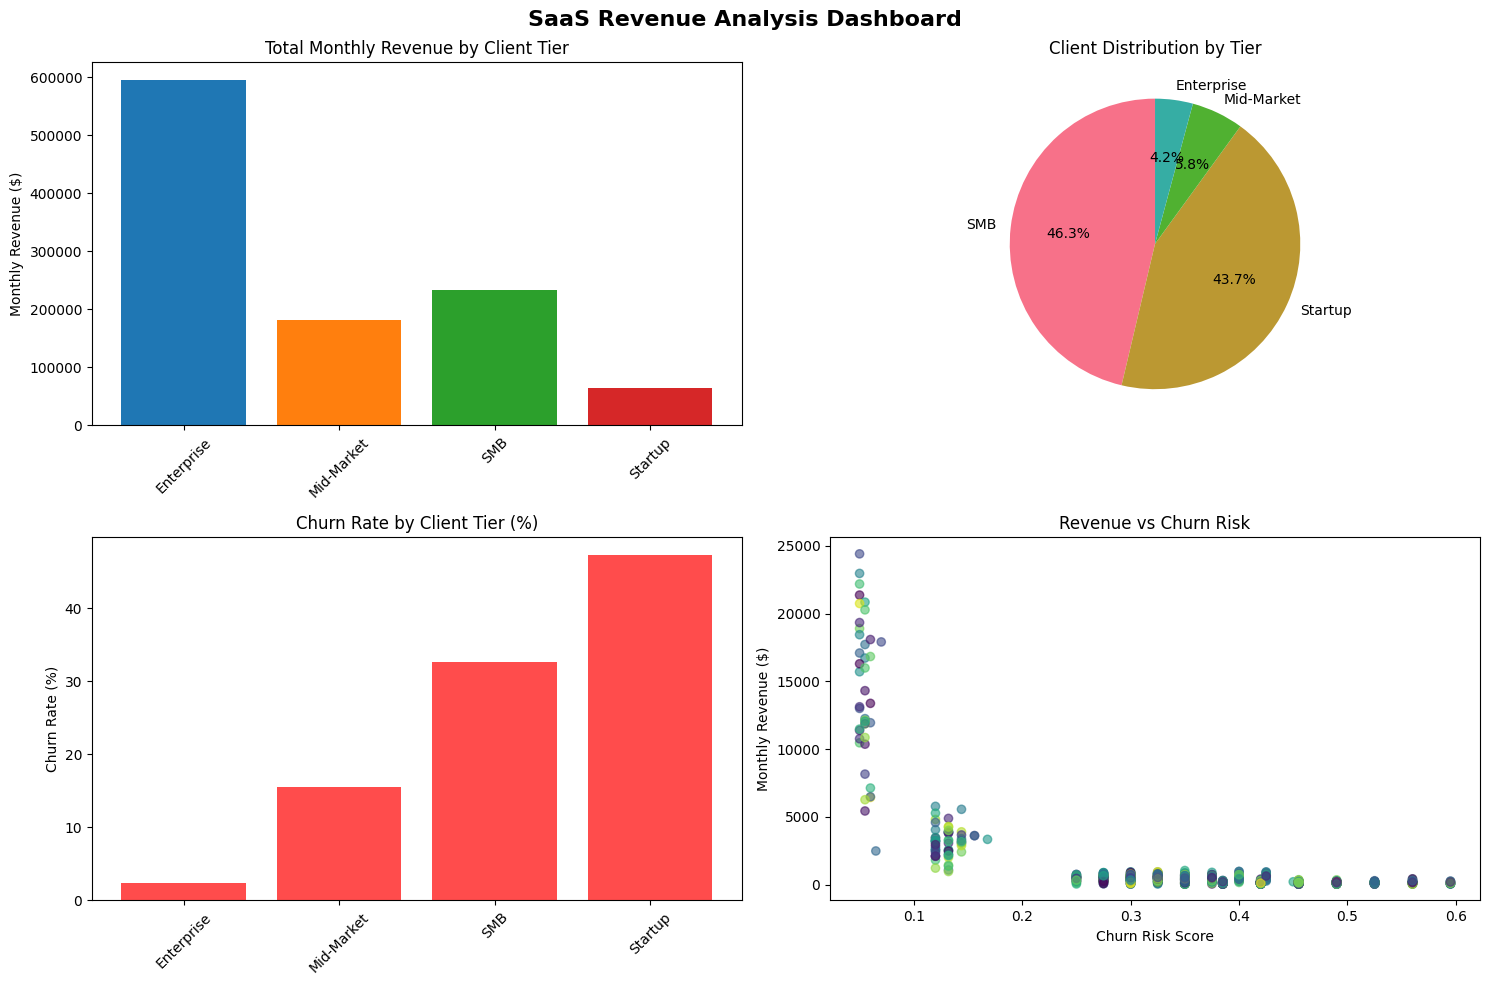

✅ Revenue analysis visualization complete!


In [6]:
# 📈 VISUALIZATION 1: Revenue Analysis

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('SaaS Revenue Analysis Dashboard', fontsize=16, fontweight='bold')

# 1. Revenue by Client Tier
tier_revenue = saas_clients.groupby('client_tier')['monthly_revenue'].sum()
axes[0, 0].bar(tier_revenue.index, tier_revenue.values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
axes[0, 0].set_title('Total Monthly Revenue by Client Tier')
axes[0, 0].set_ylabel('Monthly Revenue ($)')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Client Distribution
tier_counts = saas_clients['client_tier'].value_counts()
axes[0, 1].pie(tier_counts.values, labels=tier_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Client Distribution by Tier')

# 3. Churn Rate by Tier
churn_by_tier = saas_clients.groupby('client_tier')['has_churned'].mean() * 100
axes[1, 0].bar(churn_by_tier.index, churn_by_tier.values, color='red', alpha=0.7)
axes[1, 0].set_title('Churn Rate by Client Tier (%)')
axes[1, 0].set_ylabel('Churn Rate (%)')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Revenue vs Risk Scatter Plot
scatter = axes[1, 1].scatter(saas_clients['churn_risk_score'],
                           saas_clients['monthly_revenue'],
                           c=saas_clients['months_as_client'],
                           cmap='viridis', alpha=0.6)
axes[1, 1].set_title('Revenue vs Churn Risk')
axes[1, 1].set_xlabel('Churn Risk Score')
axes[1, 1].set_ylabel('Monthly Revenue ($)')

plt.tight_layout()
plt.show()

print("✅ Revenue analysis visualization complete!")

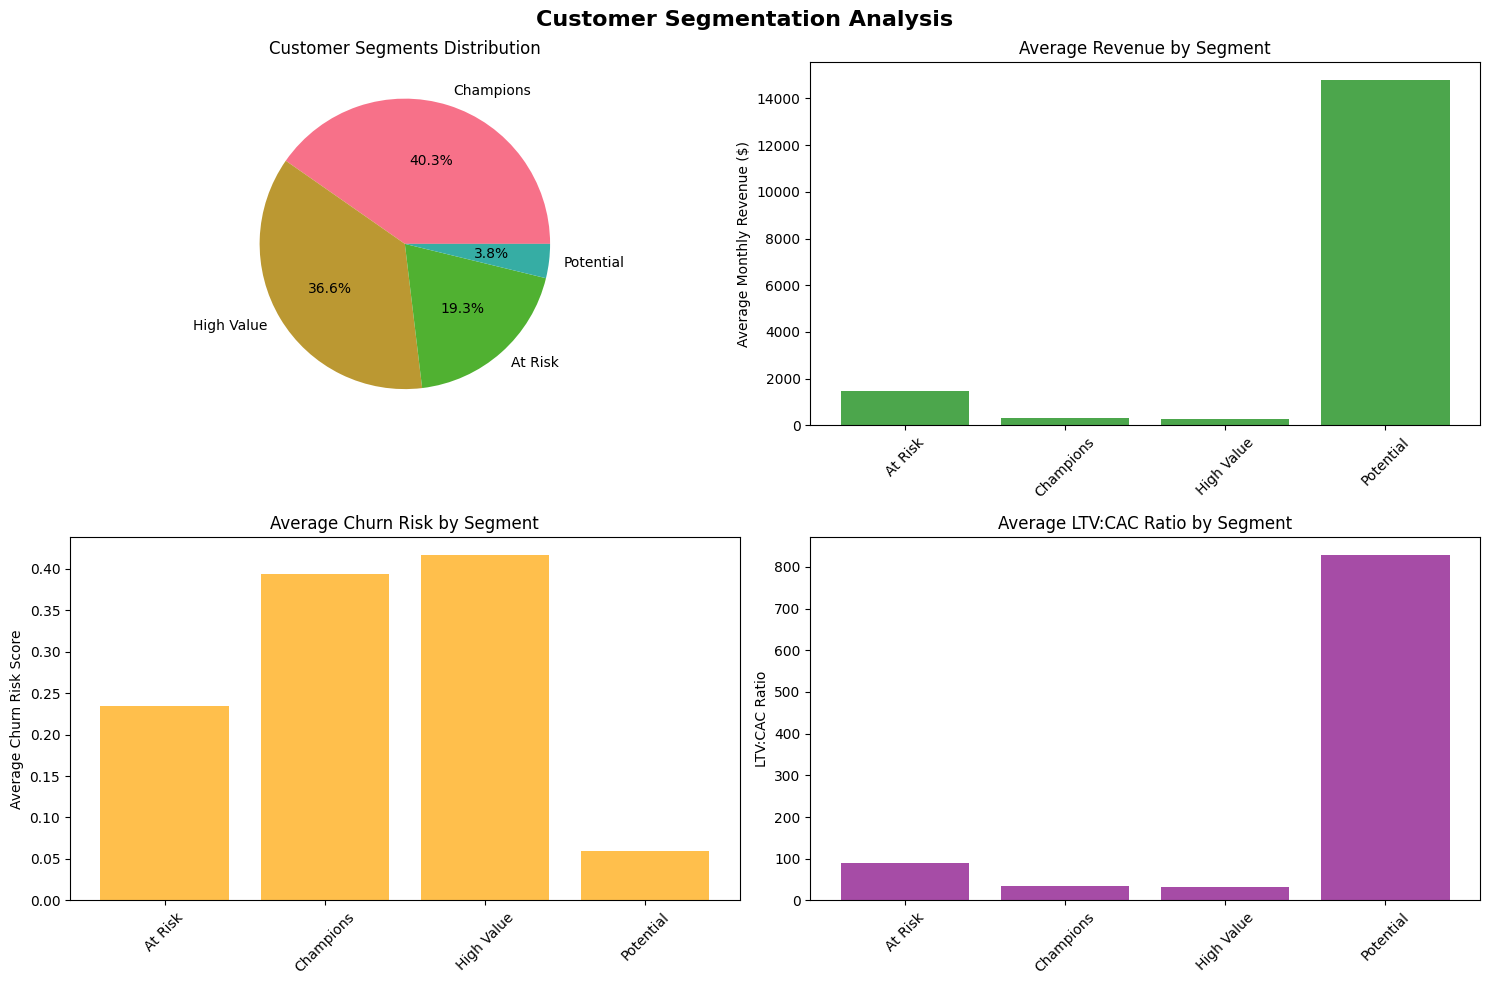

✅ Customer segmentation visualization complete!

🎯 SEGMENT SUMMARY:

Potential Segment:
  - Clients: 38
  - Avg Revenue: $14,805.76
  - Avg Churn Risk: 0.059
  - Total Revenue: $562,619.06

At Risk Segment:
  - Clients: 193
  - Avg Revenue: $1,469.56
  - Avg Churn Risk: 0.234
  - Total Revenue: $283,624.61

High Value Segment:
  - Clients: 366
  - Avg Revenue: $281.17
  - Avg Churn Risk: 0.417
  - Total Revenue: $102,908.89

Champions Segment:
  - Clients: 403
  - Avg Revenue: $312.02
  - Avg Churn Risk: 0.394
  - Total Revenue: $125,742.50


In [7]:
# 📊 VISUALIZATION 2: Customer Segmentation

# Perform K-means clustering for segmentation
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select features for clustering
features = ['monthly_revenue', 'ltv_cac_ratio', 'churn_risk_score', 'months_as_client']
X = saas_clients[features].fillna(0)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform clustering
kmeans = KMeans(n_clusters=4, random_state=42)
saas_clients['segment'] = kmeans.fit_predict(X_scaled)

# Define segment names
segment_names = {0: 'Champions', 1: 'At Risk', 2: 'Potential', 3: 'High Value'}
saas_clients['segment_name'] = saas_clients['segment'].map(segment_names)

# Create segmentation visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Customer Segmentation Analysis', fontsize=16, fontweight='bold')

# 1. Segment distribution
segment_counts = saas_clients['segment_name'].value_counts()
axes[0, 0].pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%')
axes[0, 0].set_title('Customer Segments Distribution')

# 2. Average revenue by segment
segment_revenue = saas_clients.groupby('segment_name')['monthly_revenue'].mean()
axes[0, 1].bar(segment_revenue.index, segment_revenue.values, color='green', alpha=0.7)
axes[0, 1].set_title('Average Revenue by Segment')
axes[0, 1].set_ylabel('Average Monthly Revenue ($)')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Churn risk by segment
segment_risk = saas_clients.groupby('segment_name')['churn_risk_score'].mean()
axes[1, 0].bar(segment_risk.index, segment_risk.values, color='orange', alpha=0.7)
axes[1, 0].set_title('Average Churn Risk by Segment')
axes[1, 0].set_ylabel('Average Churn Risk Score')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. LTV:CAC ratio by segment
segment_ltv_cac = saas_clients.groupby('segment_name')['ltv_cac_ratio'].mean()
axes[1, 1].bar(segment_ltv_cac.index, segment_ltv_cac.values, color='purple', alpha=0.7)
axes[1, 1].set_title('Average LTV:CAC Ratio by Segment')
axes[1, 1].set_ylabel('LTV:CAC Ratio')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("✅ Customer segmentation visualization complete!")

# Print segment summary
print("\n🎯 SEGMENT SUMMARY:")
for segment in saas_clients['segment_name'].unique():
    segment_data = saas_clients[saas_clients['segment_name'] == segment]
    print(f"\n{segment} Segment:")
    print(f"  - Clients: {len(segment_data)}")
    print(f"  - Avg Revenue: ${segment_data['monthly_revenue'].mean():,.2f}")
    print(f"  - Avg Churn Risk: {segment_data['churn_risk_score'].mean():.3f}")
    print(f"  - Total Revenue: ${segment_data['monthly_revenue'].sum():,.2f}")

In [8]:
# 💾 STEP 6: Prepare Data for Power BI Export

print("📁 Preparing data for Power BI export...")

# Create main dataset for Power BI
powerbi_data = saas_clients.copy()

# Add calculated fields that Power BI will find useful
powerbi_data['annual_revenue'] = powerbi_data['monthly_revenue'] * 12
powerbi_data['revenue_category'] = pd.cut(powerbi_data['monthly_revenue'],
                                        bins=[0, 200, 1000, 5000, float('inf')],
                                        labels=['Low', 'Medium', 'High', 'Enterprise'])

powerbi_data['risk_category'] = pd.cut(powerbi_data['churn_risk_score'],
                                     bins=[0, 0.2, 0.5, 1.0],
                                     labels=['Low Risk', 'Medium Risk', 'High Risk'])

powerbi_data['tenure_category'] = pd.cut(powerbi_data['months_as_client'],
                                       bins=[0, 6, 12, 24, float('inf')],
                                       labels=['New', 'Growing', 'Mature', 'Veteran'])

# Create summary table for Power BI
summary_data = pd.DataFrame({
    'Metric': [
        'Total Clients',
        'Active Clients',
        'Churned Clients',
        'Total MRR',
        'Average Revenue per Client',
        'Overall Churn Rate (%)',
        'Average LTV:CAC Ratio',
        'High Risk Clients'
    ],
    'Value': [
        len(saas_clients),
        len(saas_clients[~saas_clients['has_churned']]),
        len(saas_clients[saas_clients['has_churned']]),
        f"${saas_clients[~saas_clients['has_churned']]['monthly_revenue'].sum():,.2f}",
        f"${saas_clients[~saas_clients['has_churned']]['monthly_revenue'].mean():,.2f}",
        f"{len(saas_clients[saas_clients['has_churned']]) / len(saas_clients) * 100:.1f}%",
        f"{saas_clients[~saas_clients['has_churned']]['ltv_cac_ratio'].mean():.2f}",
        len(saas_clients[saas_clients['churn_risk_score'] > 0.5])
    ]
})

# Export to CSV files
powerbi_data.to_csv('saas_clients_data.csv', index=False)
summary_data.to_csv('saas_summary_metrics.csv', index=False)

print("✅ Data exported successfully!")
print("\n📁 Files created:")
print("1. 'saas_clients_data.csv' - Main dataset")
print("2. 'saas_summary_metrics.csv' - Summary metrics")

print("\n📋 Next steps:")
print("1. Download these CSV files from Colab")
print("2. Import them into Power BI")
print("3. Create visualizations")

# Show data preview
print("\n👀 Data Preview for Power BI:")
print(powerbi_data[['client_id', 'company_name', 'client_tier', 'monthly_revenue',
                   'segment_name', 'risk_category', 'revenue_category']].head())

📁 Preparing data for Power BI export...
✅ Data exported successfully!

📁 Files created:
1. 'saas_clients_data.csv' - Main dataset
2. 'saas_summary_metrics.csv' - Summary metrics

📋 Next steps:
1. Download these CSV files from Colab
2. Import them into Power BI
3. Create visualizations

👀 Data Preview for Power BI:
     client_id                  company_name client_tier  monthly_revenue  \
0  CLIENT_0001             Figueroa and Sons  Enterprise         12248.83   
1  CLIENT_0002      Garcia, Yang and Gardner  Mid-Market          2419.12   
2  CLIENT_0003              Johnson and Sons  Mid-Market          5559.49   
3  CLIENT_0004  Johnson, Gonzalez and Santos  Enterprise         18895.96   
4  CLIENT_0005                      Cole LLC  Mid-Market          5778.31   

  segment_name risk_category revenue_category  
0    Potential      Low Risk       Enterprise  
1      At Risk      Low Risk             High  
2      At Risk      Low Risk       Enterprise  
3    Potential      Low Risk 

In [9]:
# ⬇️ STEP 7: Download Files from Google Colab

from google.colab import files

print("📥 Downloading files...")

# Download the CSV files
files.download('saas_clients_data.csv')
files.download('saas_summary_metrics.csv')

print("✅ Files downloaded to your computer!")
print("Check your Downloads folder for:")
print("- saas_clients_data.csv")
print("- saas_summary_metrics.csv")

📥 Downloading files...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Files downloaded to your computer!
Check your Downloads folder for:
- saas_clients_data.csv
- saas_summary_metrics.csv
